In [16]:

 !pip install yfinance
 !pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00


In [1]:
!git clone https://github.com/shammuse/Time-Series-Forecasting-for-Portfolio-Optimization.git  # Replace with your GitHub URL

Cloning into 'Time-Series-Forecasting-for-Portfolio-Optimization'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 58 (delta 23), reused 53 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 2.46 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys,os
import pandas as pd
sys.path.append('/content/drive/MyDrive/my_project')


#### Create the my_project directory and files within Google Drive:

###  Load data for all symbols

In [5]:
tsla_df=tsla_df.dropna()
tsla_df.set_index('Date', inplace=True)

bnd_df=bnd_df.dropna()
bnd_df.set_index('Date', inplace=True)

spy_df=spy_df.dropna()
spy_df.set_index('Date', inplace=True)

In [4]:
tsla_df = pd.read_csv('/content/drive/MyDrive/my_project/TSLA_data.csv', parse_dates=True)
bnd_df = pd.read_csv('/content/drive/MyDrive/my_project/BND_data.csv', parse_dates=True)
spy_df = pd.read_csv('/content/drive/MyDrive/my_project/SPY_data.csv', parse_dates=True)

In [7]:
import sys
sys.path.append('/content/Time-Series-Forecasting-for-Portfolio-Optimization/scripts')  # Update with your repo name

In [9]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.7 MB/s eta 0:00:00


In [10]:

from model_builder import TimeSeriesForecaster

In [11]:
# Initialize forecaster
tsla_forecaster = TimeSeriesForecaster(tsla_df, column='Close')
bnd_forecaster = TimeSeriesForecaster(bnd_df, column='Close')
spy_forecaster = TimeSeriesForecaster(spy_df, column='Close')

In [12]:
# Prepare the data (split into train and test sets, scale the values)
tsla_forecaster.prepare_data()
bnd_forecaster.prepare_data()
spy_forecaster.prepare_data()

Data split: 2945 train, 737 test
Data split: 292 train, 73 test
Data split: 2945 train, 737 test


### Train all models for TSLA

Training ARIMA model
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17962.020, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17966.540, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17967.860, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17967.853, Time=1.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17968.269, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17965.859, Time=1.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.457 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2945
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8985.135
Date:                Fri, 28 Feb 2025   AIC                         -17968.269
Time:                        11:33:13   BIC                         -17962.282
Sample:                    01-02-2015   HQIC                        -17966.114
                         - 01-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   9.72e-07    134.475      0.000       0.00

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=5.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15831.898, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16699.749, Time=2.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=3.90 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15845.858, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-17075.078, Time=2.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=9.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=4.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-17070.941, Time=1.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-17073.082, Time=5.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-17073.081, Time=3.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-17075.046, Time=3.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-17071.070, Time=2.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-17073.081, Time=8.19 sec

Best model:  ARIMA(1,1,0)(2,1,0)[5]          
Total fit time: 53.382 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2945
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 5)   Log Likelihood                8541.539
Date:                           Fri, 28 Feb 2025   AIC                         -17075.078
Time:                                   11:34:06   BIC                         -17051.135
Sample:                               01-02-2015   HQIC                        -17066.457
                                    - 01-24-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0441 - val_loss: 0.0031
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0

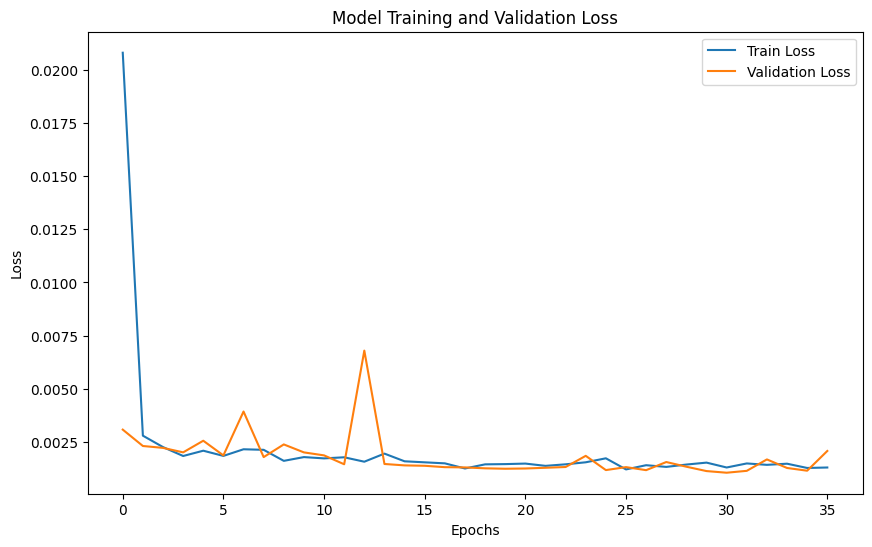

In [13]:
tsla_forecaster.train_arima()   # Train ARIMA model for TSLA
tsla_forecaster.train_sarima()  # Train SARIMA model for TSLA
tsla_forecaster.train_lstm()    # Train LSTM model for TSLA

### Train all models for BND stock symbol

Training ARIMA model
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-974.883, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-977.598, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-976.308, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-976.345, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-979.076, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.129 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 490.538
Date:                Fri, 28 Feb 2025   AIC                           -979.076
Time:                        11:37:27   BIC                           -975.403
Sample:                    01-02-2020   HQIC                          -977.605
                         - 10-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0020   3.24e-05     62.038      0.000       0.002      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-743.384, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-861.028, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=1.42 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-741.384, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-872.501, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-874.083, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[5]             : AIC=-861.713, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-872.486, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-871.353, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=-872.085, Time=0.46 sec

Best model:  ARIMA(0,1,0)(2,1,0)[5]          
Total fit time: 8.383 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  292
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 5)   Log Likelihood                 440.042
Date:                           Fri, 28 Feb 2025   AIC                           -874.083
Time:                                   11:37:35   BIC                           -863.115
Sample:                               01-02-2020   HQIC                          -869.687
                                    - 10-19-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.5488 - val_loss: 0.4774
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.3149 - val_loss: 0.0383
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0602 - val_loss: 0.0023
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0318 - val_loss: 0.0156
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0299 - val_loss: 0.0083
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0278 - val_loss: 0.0025
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0293 - val_loss: 5.8059e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0228 - val_loss: 9.3092e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0229 - val_loss: 3.3488e-04
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0260 - val_loss: 3.8830e-04
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0221 - val_loss: 1.7487e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0219

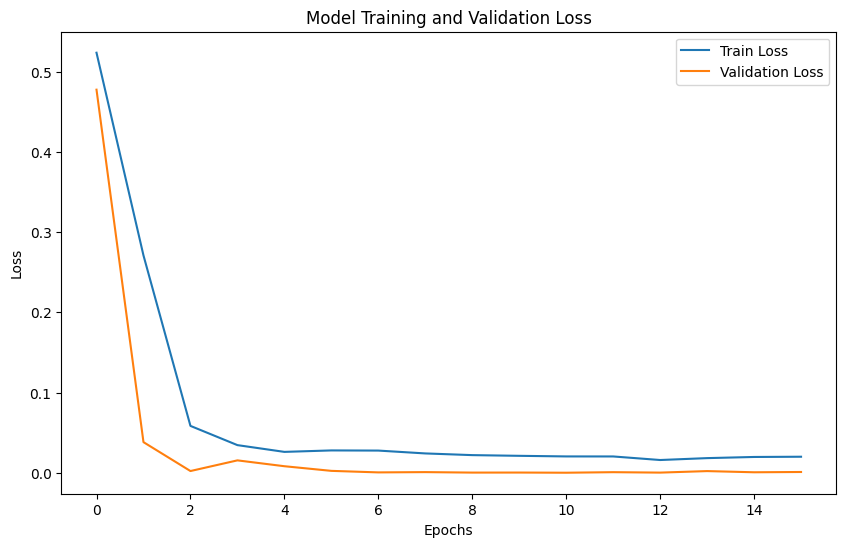

In [14]:
# Train ARIMA model for BND stock symbol
bnd_forecaster.train_arima()
# Train SARIMA model for BND stock symbol
bnd_forecaster.train_sarima()
# Train LSTM model for BND stock symbol
bnd_forecaster.train_lstm()

Training ARIMA model
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19106.313, Time=1.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19087.508, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19106.708, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19106.514, Time=2.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19087.532, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-19104.718, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19104.712, Time=3.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-19102.706, Time=2.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-19106.367, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 11.651 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2945
Model:               SARIMAX(1, 1, 0)   Log Likelihood                9556.354
Date:                Fri, 28 Feb 2025   AIC                         -19106.708
Time:                        11:46:13   BIC                         -19088.745
Sample:                    01-02-2015   HQIC                        -19100.240
                         - 01-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.477      0.140   -8.68e-

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=8.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-16846.043, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-17743.953, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=4.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-16867.797, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-18142.839, Time=1.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=9.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=4.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-18118.371, Time=1.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-18140.974, Time=6.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-18140.928, Time=4.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-18142.773, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-18138.902, Time=3.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-18140.841, Time=6.86 sec

Best model:  ARIMA(1,1,0)(2,1,0)[5]          
Total fit time: 54.599 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2945
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 5)   Log Likelihood                9075.419
Date:                           Fri, 28 Feb 2025   AIC                         -18142.839
Time:                                   11:47:07   BIC                         -18118.895
Sample:                               01-02-2015   HQIC                        -18134.217
                                    - 01-24-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0762 - val_loss: 0.0075
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0

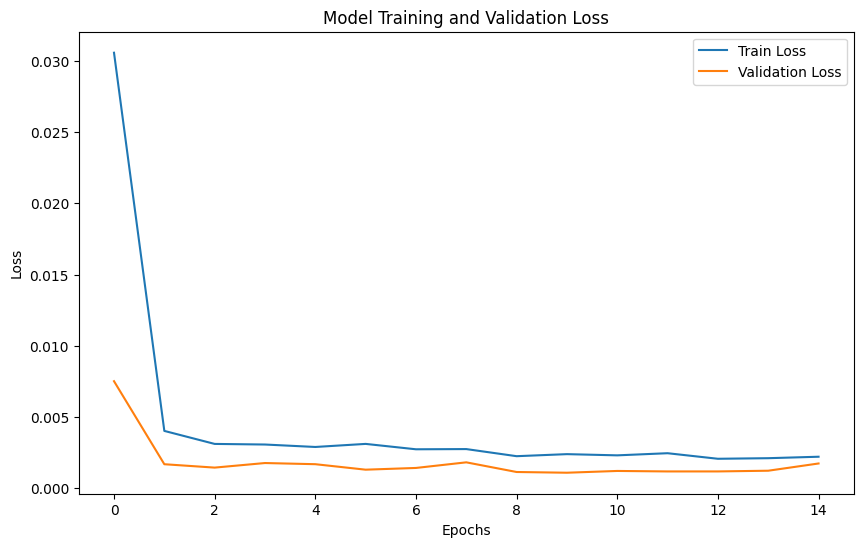

In [15]:
spy_forecaster.train_arima()   # Train ARIMA model for SPY stock symbol
spy_forecaster.train_sarima()  # Train SARIMA model for SPY stock symbol
spy_forecaster.train_lstm()    # Train LSTM model for SPY stock symbol

### Make predictions for all symbols

In [16]:
# Make predictions
tsla_forecaster.make_prediction()
bnd_forecaster.make_prediction()
spy_forecaster.make_prediction()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

### Evaluate models for TSLA stock symbol

In [17]:
# Evaluate models for TSLA stock symbol
tsla_forecaster.evaluate_model()

ARIMA - MAE: 0.23, RMSE: 0.28, MAPE: 36.21%
SARIMA - MAE: 1.68, RMSE: 1.97, MAPE: 306.10%
LSTM - MAE: 0.16, RMSE: 0.22, MAPE: 24.70%

Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.226722  0.280381   36.213170
1  SARIMA  1.679229  1.965773  306.098901
2    LSTM  0.161438  0.219420   24.695723


## Evaluate models for BND stock symbol

In [ ]:
# Evaluate models for BND stock symbol
bnd_forecaster.evaluate_model()

ARIMA - MAE: 0.07, RMSE: 0.09, MAPE: 120.02%
SARIMA - MAE: 2.36, RMSE: 2.75, MAPE: 3504.72%
LSTM - MAE: 0.30, RMSE: 0.31, MAPE: 574.13%

Model Evaluation Metrics:
     Model       MAE      RMSE         MAPE
0   ARIMA  0.072830  0.087379   120.015573
1  SARIMA  2.363791  2.745280  3504.719244
2    LSTM  0.295610  0.307574   574.131238


## Evaluate models for SPY stock symbol

In [ ]:
# Evaluate models for SPY stock symbol
spy_forecaster.evaluate_model()

ARIMA - MAE: 0.24, RMSE: 0.31, MAPE: 21.88%
SARIMA - MAE: 1.76, RMSE: 2.01, MAPE: 169.03%
LSTM - MAE: 0.37, RMSE: 0.43, MAPE: 34.92%

Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.241145  0.308883   21.877344
1  SARIMA  1.758939  2.007907  169.030391
2    LSTM  0.369584  0.432308   34.917927


### Forecast plot for TSLA Asset

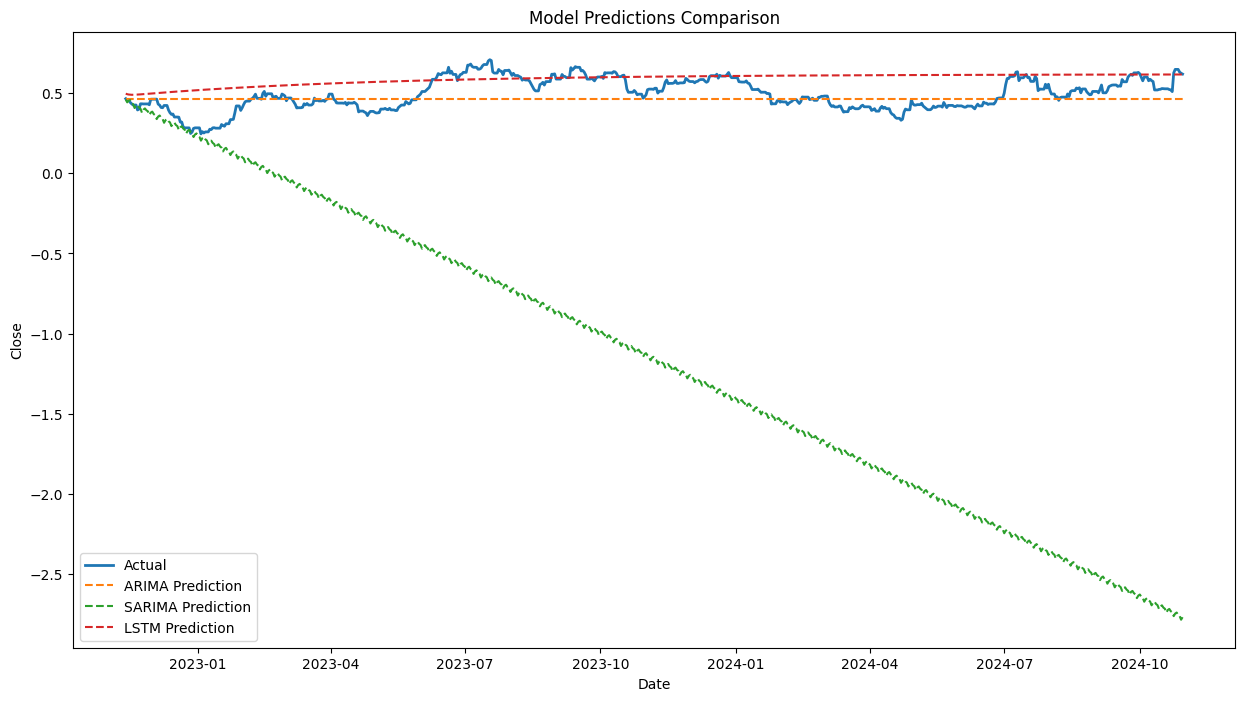

In [ ]:
# Plot results
tsla_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for TSLA stock prediction.
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.

### Forecast plot for BND Asset

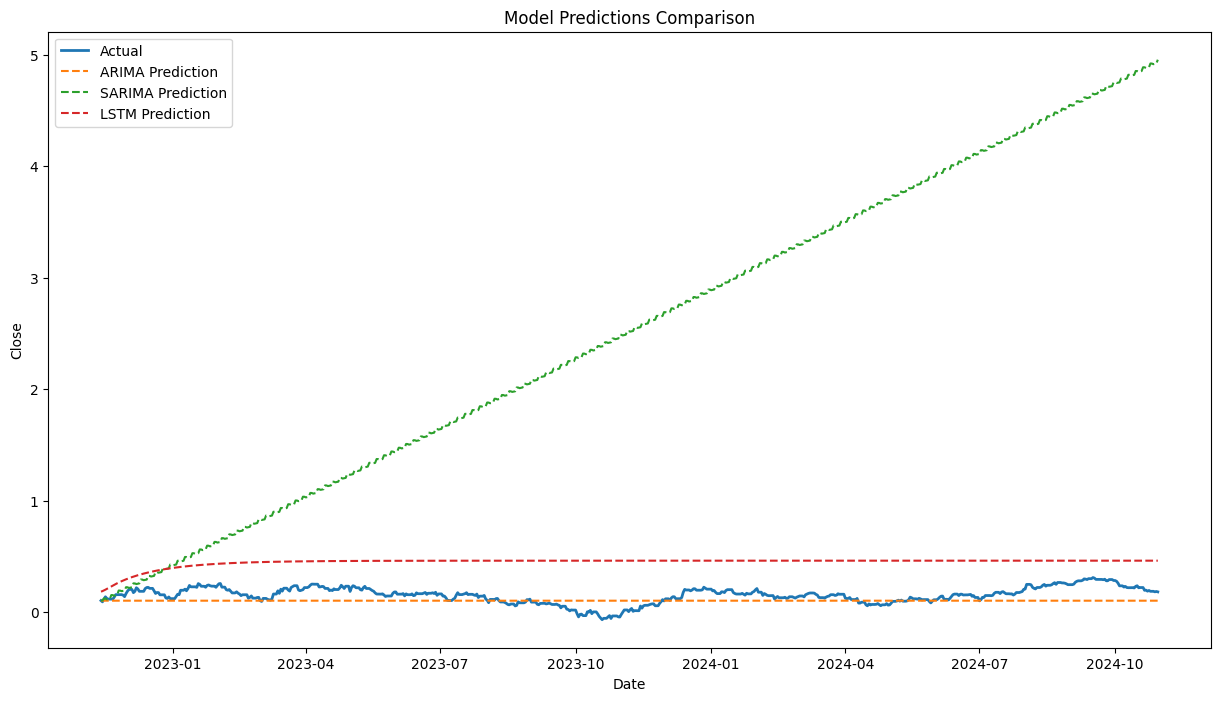

In [ ]:
bnd_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for BND stock prediction.
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.

### Forecast plot for SPY Asset

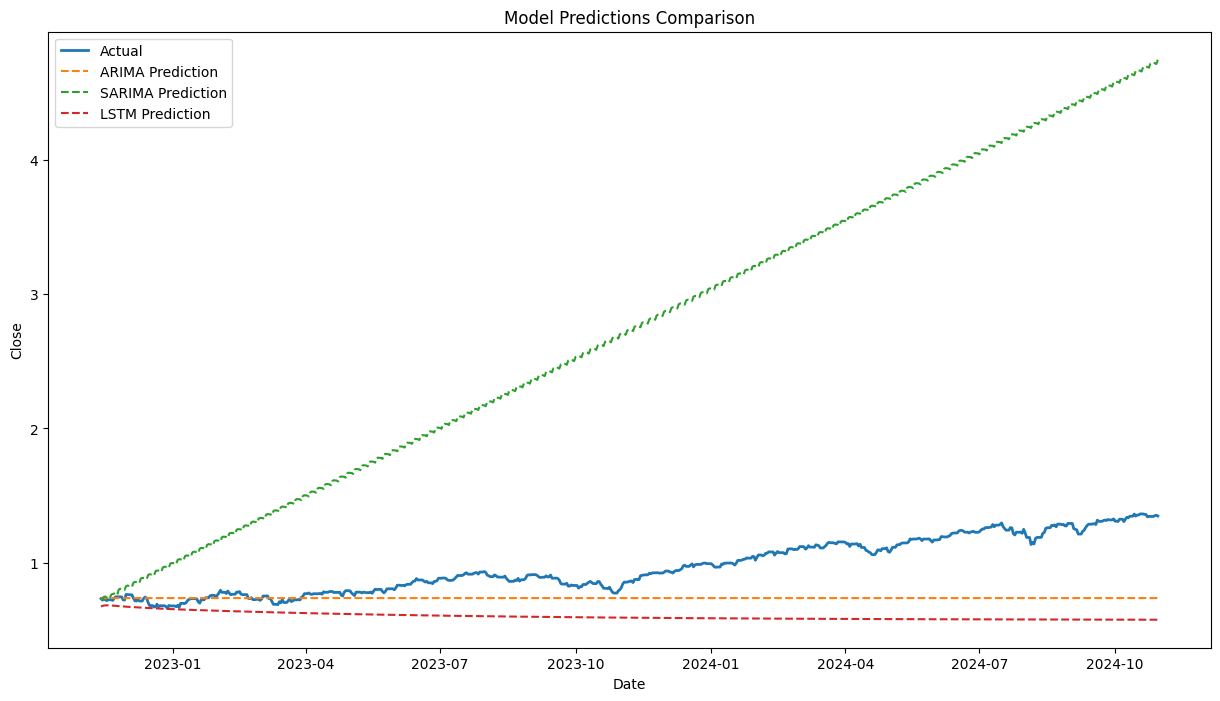

In [ ]:
spy_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for SPY stock prediction.
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.